In [121]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from xgboost import XGBRegressor

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import AdaBoostRegressor
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
data = pd.read_csv('/Users/anupprakash/Documents/ExcelRDataScience/DataSetFile/weight-height.csv')

In [3]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
data.tail()

,Gender,Height,Weight
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461
9999,Female,61.944246,113.649103


In [5]:
data.shape

(10000, 3)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Height,10000.0,66.367560,3.847528,54.263133,63.505620,66.318070,69.174262,78.998742
Weight,10000.0,161.440357,32.108439,64.700127,135.818051,161.212928,187.169525,269.989699


In [8]:
data.describe(include='O').transpose()

,count,unique,top,freq
Gender,10000,2,Male,5000


In [9]:
# we can see there are no null value within the dataset
# weight have high STD so we can conclude it must be skewed data and with outliers

In [10]:
size = (19,9)

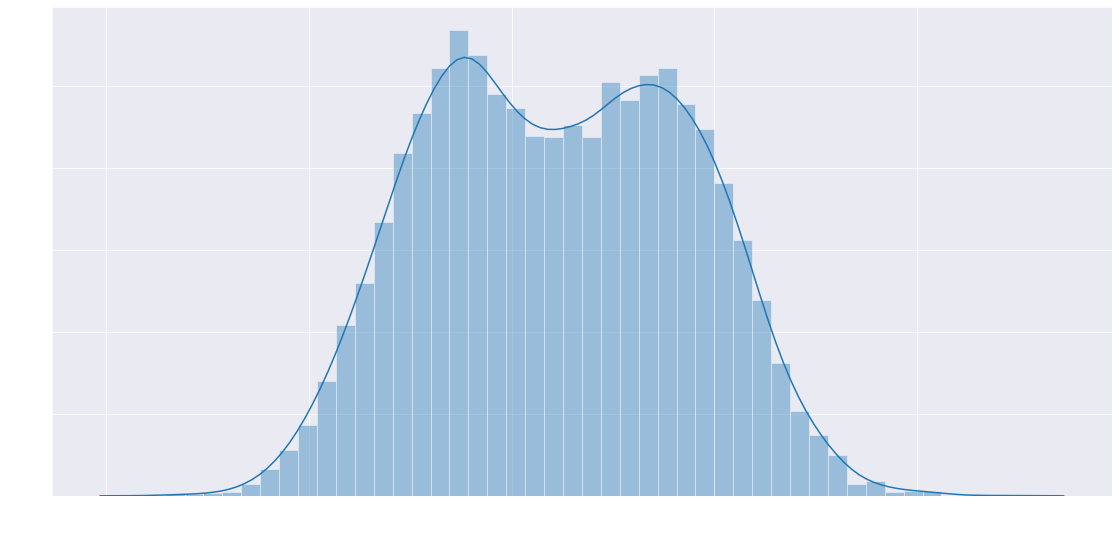

In [11]:
plt.figure(figsize=size)

sns.distplot(data['Weight'])

plt.xlabel('Weight',fontsize=15,color='white')

plt.xticks(fontsize=15,color='white')
plt.yticks(fontsize=15,color='white')

plt.show()

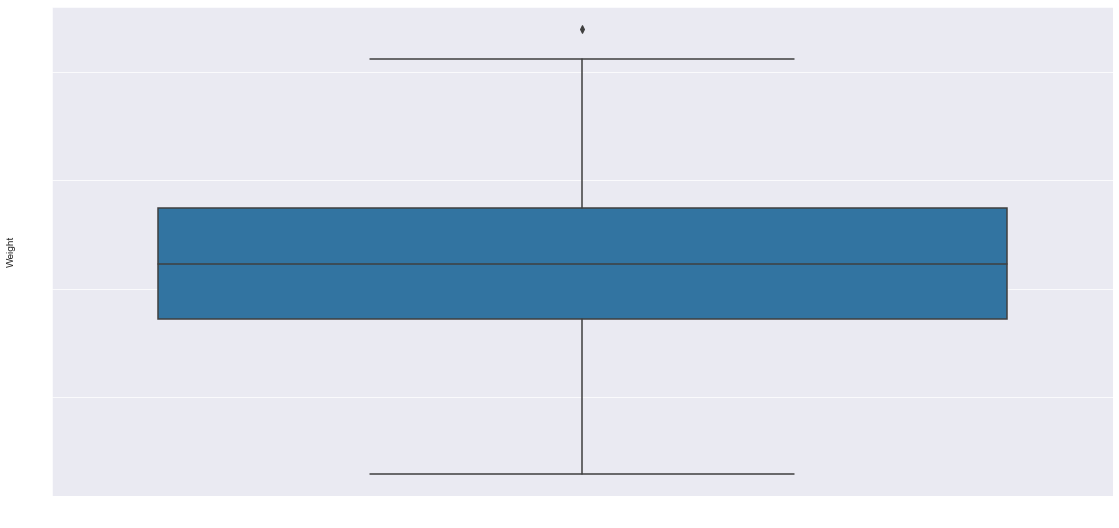

In [12]:
plt.figure(figsize=size)

sns.boxplot(data['Weight'],orient='v')

plt.xlabel('Weight',fontsize=15,color='white')

plt.xticks(fontsize=15,color='white')
plt.yticks(fontsize=15,color='white')

plt.show()

In [13]:
# it seem it is normally distributed and with very few outliers

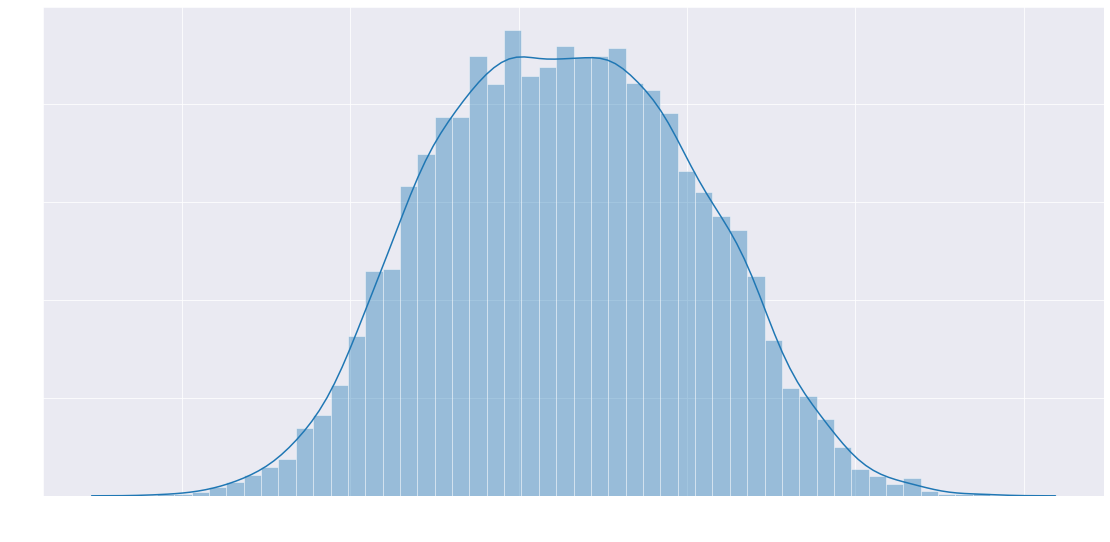

In [14]:
plt.figure(figsize=size)

sns.distplot(data['Height'])

plt.xlabel('height',fontsize=15,color='white')

plt.xticks(fontsize=15,color='white')
plt.yticks(fontsize=15,color='white')

plt.show()

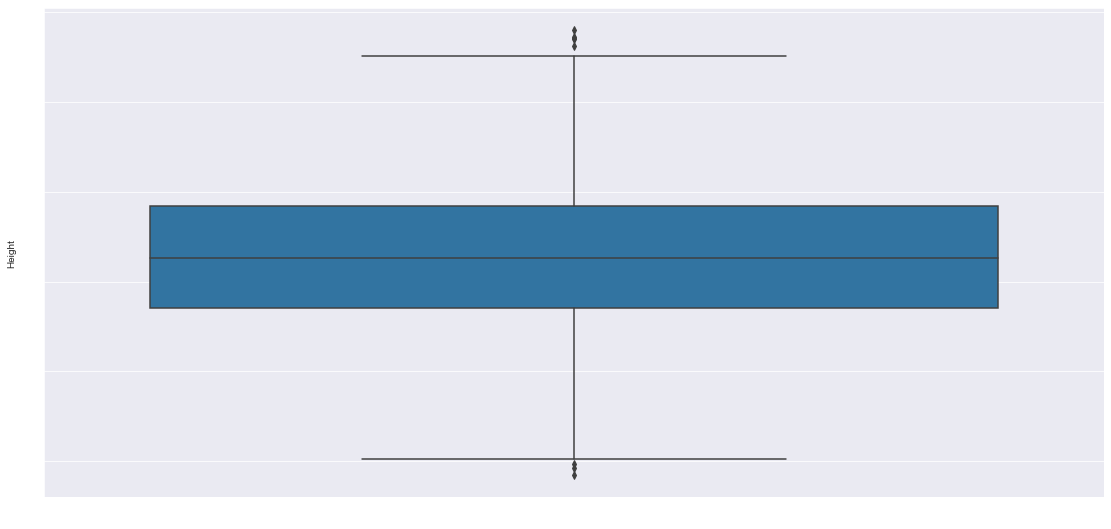

In [15]:
plt.figure(figsize=size)

sns.boxplot(data['Height'],orient='v')

plt.xlabel('Height',fontsize=15,color='white')

plt.xticks(fontsize=15,color='white')
plt.yticks(fontsize=15,color='white')

plt.show()

In [16]:
# it like it is normally distribute and with very few outliers

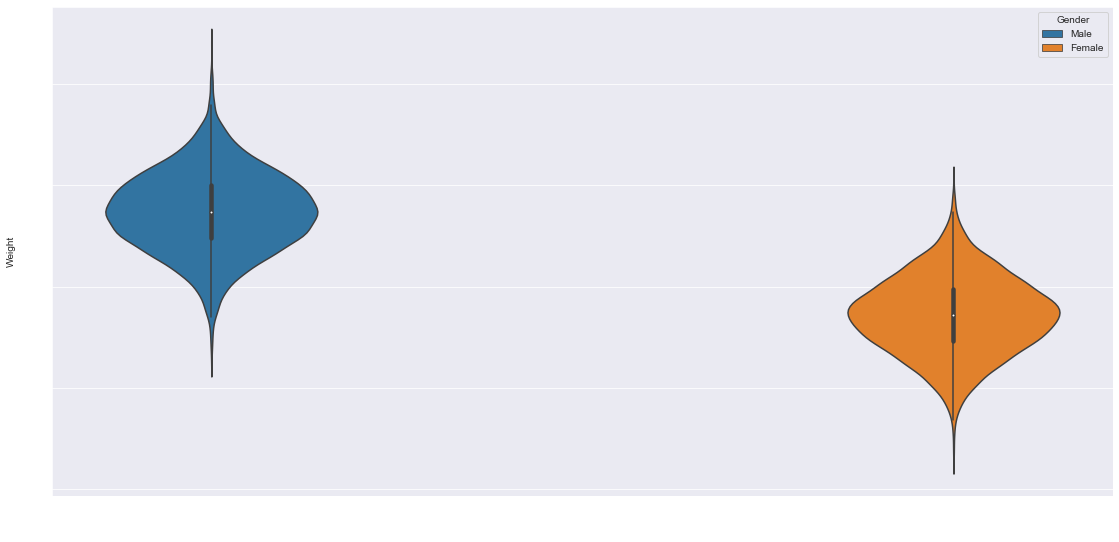

In [17]:
plt.figure(figsize=size)

sns.violinplot(x='Gender',y='Weight',data=data,hue='Gender')

plt.xlabel('Gender',fontsize=15,color='white')

plt.xticks(fontsize=15,color='white')
plt.yticks(fontsize=15,color='white')

plt.show()

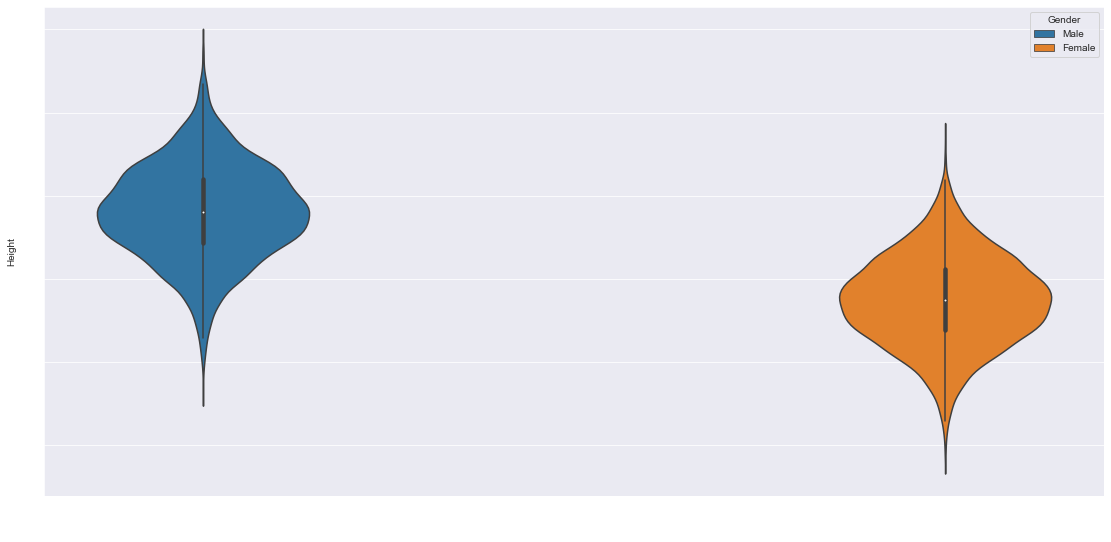

In [18]:
plt.figure(figsize=size)

sns.violinplot(x='Gender',y='Height',data=data,hue='Gender')

plt.xlabel('Gender',fontsize=15,color='white')

plt.xticks(fontsize=15,color='white')
plt.yticks(fontsize=15,color='white')

plt.show()

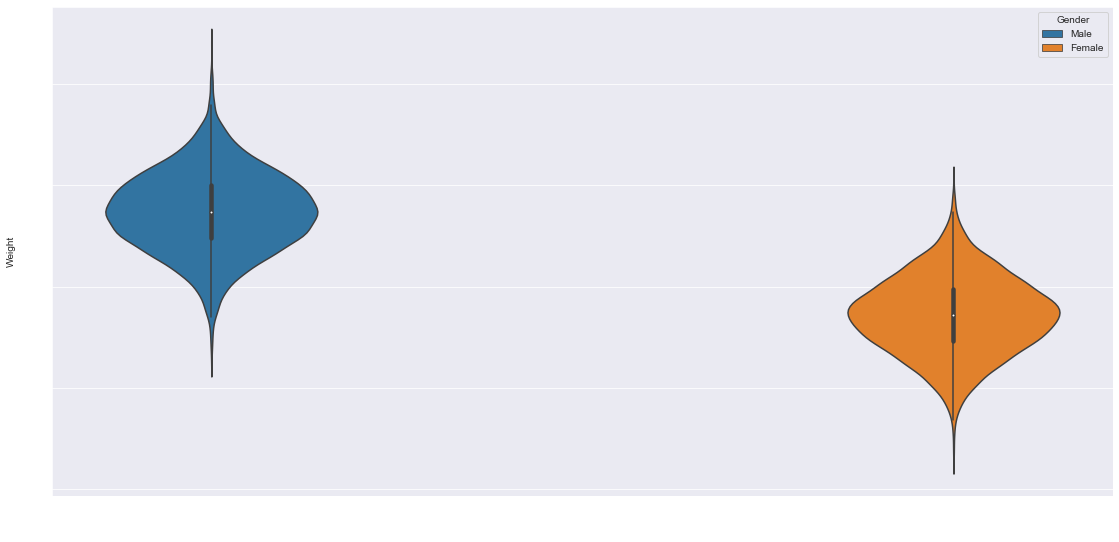

In [19]:
plt.figure(figsize=size)

sns.violinplot(x='Gender',y='Weight',data=data,hue='Gender')

plt.xlabel('Gender',fontsize=15,color='white')

plt.xticks(fontsize=15,color='white')
plt.yticks(fontsize=15,color='white')

plt.show()

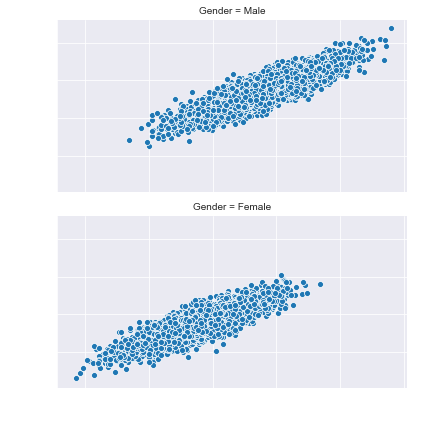

In [42]:
grid = sns.FacetGrid(data=data,row = 'Gender',aspect=1.9)
grid.map(sns.scatterplot,'Height','Weight')

grid.set_xlabels('Height',fontsize=15,color='white')
grid.set_ylabels('Weight',fontsize=15,color='white')

grid.set_xticklabels(fontsize=15, rotation=30,color='white')
grid.set_yticklabels(fontsize=15,color='white')

plt.show()

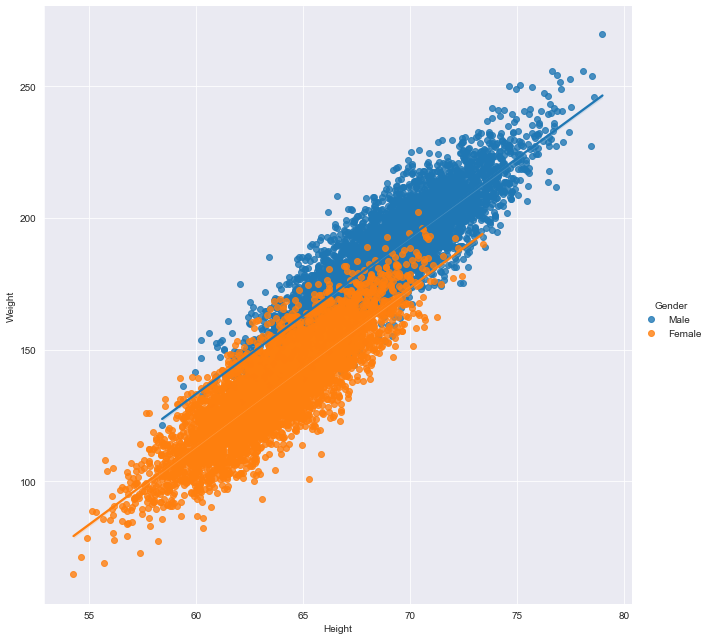

In [51]:
sns.lmplot(x='Height',y='Weight',data=data,height=9,hue='Gender')

plt.show()

In [54]:
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])

In [56]:
trainData = StandardScaler().fit_transform(data.drop('Weight',1))

In [58]:
xTrain,xTest,yTrain,yTest = train_test_split(trainData,data['Weight'],test_size=0.2,random_state=1)

In [59]:
xTrain.shape

(8000, 2)

In [60]:
lr = LinearRegression()

In [61]:
lr = lr.fit(xTrain,yTrain)

In [62]:
pred = lr.predict(xTest)

In [64]:
LR_PredData = pd.DataFrame({'Actual':yTest,'Predicted':pred.flatten()})

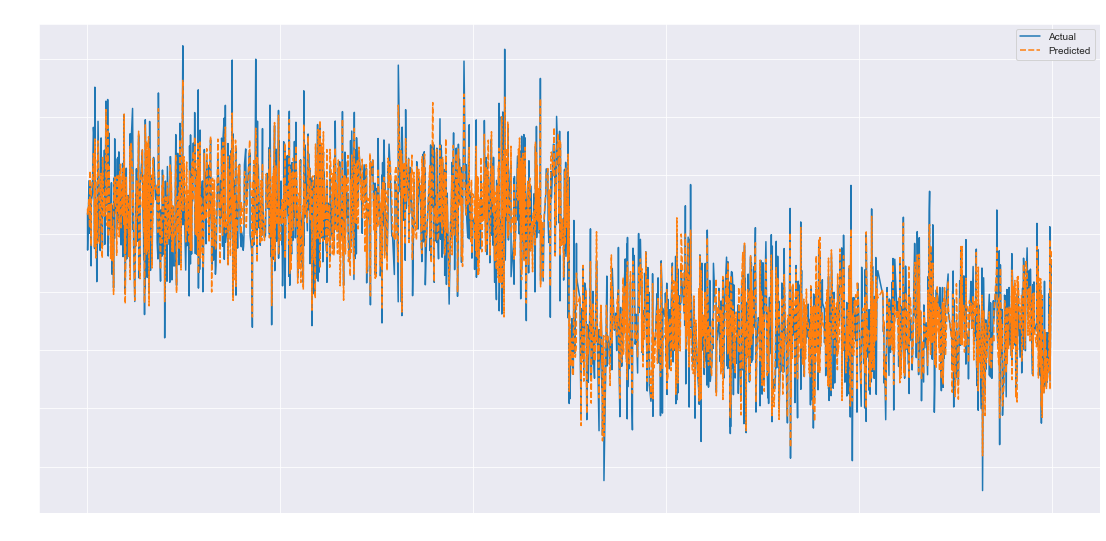

In [71]:
plt.figure(figsize=size)

sns.lineplot(data=LR_PredData)

plt.title('MSE = %0.2f'%(mean_squared_error(yTest,pred)),fontsize=15,color='white')

plt.xticks(fontsize=15,color='white')
plt.yticks(fontsize=15,color='white')

plt.show()

In [72]:
r2_score(yTest,pred)

0.9066484076989247

In [101]:
xgb = XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.5,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [102]:
xgb = xgb.fit(xTrain,yTrain)

In [103]:
xgbPred = xgb.predict(xTest)

In [104]:
LR_PredData = pd.DataFrame({'Actual':yTest,'Predicted':xgbPred.flatten()})

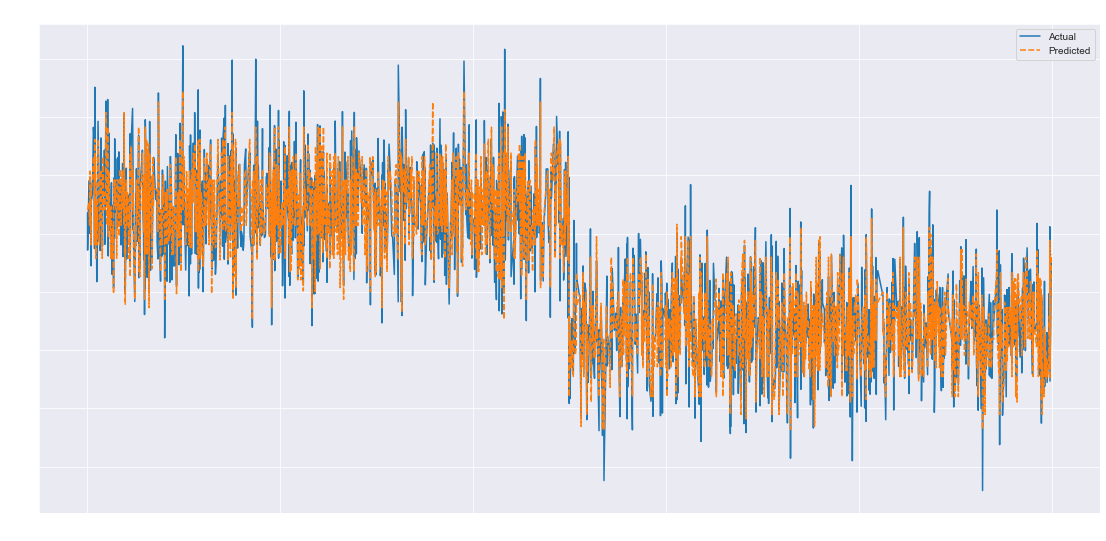

In [105]:
plt.figure(figsize=size)

sns.lineplot(data=LR_PredData)

plt.title('MSE = %0.2f'%(mean_squared_error(yTest,xgbPred)),fontsize=15,color='white')

plt.xticks(fontsize=15,color='white')
plt.yticks(fontsize=15,color='white')

plt.show()

In [106]:
r2_score(yTest,xgbPred)

0.9038605131339614

In [112]:
score =list()

for x in range(0,10):
    csv = cross_val_score(XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10),trainData,data['Weight'],cv=10)
    print(csv.mean())
    score.append(csv.mean())

-8.033666724064442
-8.033666724064442
-8.033666724064442
-8.033666724064442
-8.033666724064442
-8.033666724064442
-8.033666724064442
-8.033666724064442
-8.033666724064442
-8.033666724064442


In [114]:
np.mean(score)

-8.033666724064442

In [116]:
score =list()

for x in range(0,10):
    csv = cross_val_score(XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10),xTrain,yTrain,cv=10)
    print(csv.mean())
    score.append(csv.mean())

-2.366463418938688
-2.366463418938688
-2.366463418938688
-2.366463418938688
-2.366463418938688
-2.366463418938688
-2.366463418938688
-2.366463418938688
-2.366463418938688
-2.366463418938688


In [117]:
np.mean(score)

-2.3664634189386886

In [122]:
ada = AdaBoostRegressor(
    base_estimator=LinearRegression(),
    n_estimators=50,
    learning_rate=1.0,
    loss='linear',
    random_state=None,
)

In [123]:
ada.fit(xTrain,yTrain)

AdaBoostRegressor(base_estimator=LinearRegression(copy_X=True,
                                                  fit_intercept=True,
                                                  n_jobs=None,
                                                  normalize=False),
                  learning_rate=1.0, loss='linear', n_estimators=50,
                  random_state=None)

In [124]:
adaPred = ada.predict(xTest)

In [126]:
ada_PredData = pd.DataFrame({'Actual':yTest,'Predicted':adaPred.flatten()})

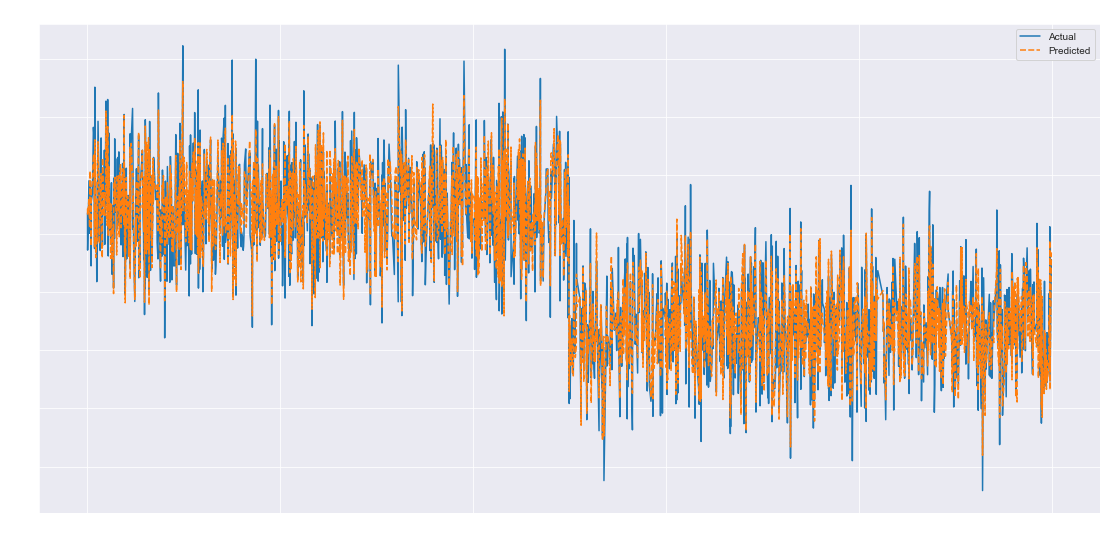

In [147]:
plt.figure(figsize=size)

sns.lineplot(data=ada_PredData)

plt.title('Ada Boosting MSE = %0.2f'%(mean_squared_error(yTest,adaPred)),fontsize=15,color='white')

plt.xticks(fontsize=15,color='white')
plt.yticks(fontsize=15,color='white')

plt.show()

In [129]:
r2_score(yTest,adaPred)

0.9064079290474298

In [130]:
### Neural Network

In [224]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from keras.optimizers import Adam

In [225]:
xTrain.shape

(8000, 2)

In [226]:
model = Sequential()

model.add(Dense(15,activation='relu',input_shape=(2,)))
model.add(Dense(5,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mse',optimizer=Adam(lr=0.4))

In [227]:
call = EarlyStopping(verbose=0,monitor='loss_val',patience=5)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)

In [228]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 15)                45        
_________________________________________________________________
dense_40 (Dense)             (None, 5)                 80        
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 6         
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [229]:
model.fit(xTrain,yTrain,validation_data=(xTest,yTest),callbacks=[call],epochs=100)

Train on 8000 samples, validate on 2000 samples
Epoch 1/100
8000/8000 [==============================] - 1s 77us/step - loss: 26785.4216 - val_loss: 26720.0130
Epoch 2/100
8000/8000 [==============================] - 0s 51us/step - loss: 26784.9427 - val_loss: 26720.0130
Epoch 3/100
8000/8000 [==============================] - 0s 57us/step - loss: 26784.9428 - val_loss: 26720.0130
Epoch 4/100
8000/8000 [==============================] - 0s 52us/step - loss: 26784.9429 - val_loss: 26720.0130
Epoch 5/100
8000/8000 [==============================] - 0s 52us/step - loss: 26784.9428 - val_loss: 26720.0130
Epoch 6/100
8000/8000 [==============================] - 0s 52us/step - loss: 26784.9428 - val_loss: 26720.0130
Epoch 7/100
8000/8000 [==============================] - 0s 52us/step - loss: 26784.9429 - val_loss: 26720.0130
Epoch 8/100
8000/8000 [==============================] - 0s 52us/step - loss: 26784.9429 - val_loss: 26720.0130
Epoch 9/100
8000/8000 [==============================] -

8000/8000 [==============================] - 0s 53us/step - loss: 26784.9428 - val_loss: 26720.0130
Epoch 74/100
8000/8000 [==============================] - 0s 48us/step - loss: 26784.9428 - val_loss: 26720.0130
Epoch 75/100
8000/8000 [==============================] - 0s 53us/step - loss: 26784.9428 - val_loss: 26720.0130
Epoch 76/100
8000/8000 [==============================] - 0s 49us/step - loss: 26784.9429 - val_loss: 26720.0130
Epoch 77/100
8000/8000 [==============================] - 0s 50us/step - loss: 26784.9429 - val_loss: 26720.0130
Epoch 78/100
8000/8000 [==============================] - 0s 50us/step - loss: 26784.9428 - val_loss: 26720.0130
Epoch 79/100
8000/8000 [==============================] - 0s 52us/step - loss: 26784.9428 - val_loss: 26720.0130
Epoch 80/100
8000/8000 [==============================] - 0s 49us/step - loss: 26784.9429 - val_loss: 26720.0130
Epoch 81/100
8000/8000 [==============================] - 0s 50us/step - loss: 26784.9429 - val_loss: 26720.0

In [230]:
his = pd.DataFrame(model.history.history)

In [231]:
his

,val_loss,loss
0,26720.013,26785.421578
1,26720.013,26784.942672
2,26720.013,26784.942820
3,26720.013,26784.942875
4,26720.013,26784.942758
...,...,...
95,26720.013,26784.942797
96,26720.013,26784.942883
97,26720.013,26784.942992
98,26720.013,26784.942852


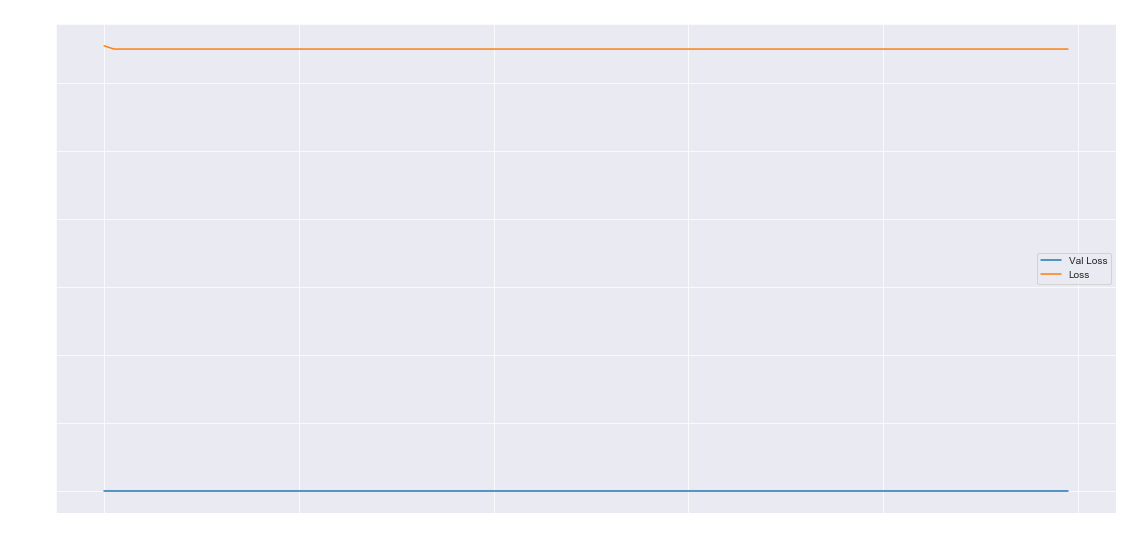

In [232]:
plt.figure(figsize=size)

sns.lineplot(data=his['val_loss'],label='Val Loss')
sns.lineplot(data=his['loss'],label='Loss')

plt.title('MSE',fontsize=15,color='white')

plt.legend()

plt.xticks(fontsize=15,color='white')
plt.yticks(fontsize=15,color='white')

plt.show()

In [233]:
dpPred = model.predict(xTest)

In [234]:
NN_pred = pd.DataFrame({'Actual':yTest,'Predicted':dpPred.flatten()})

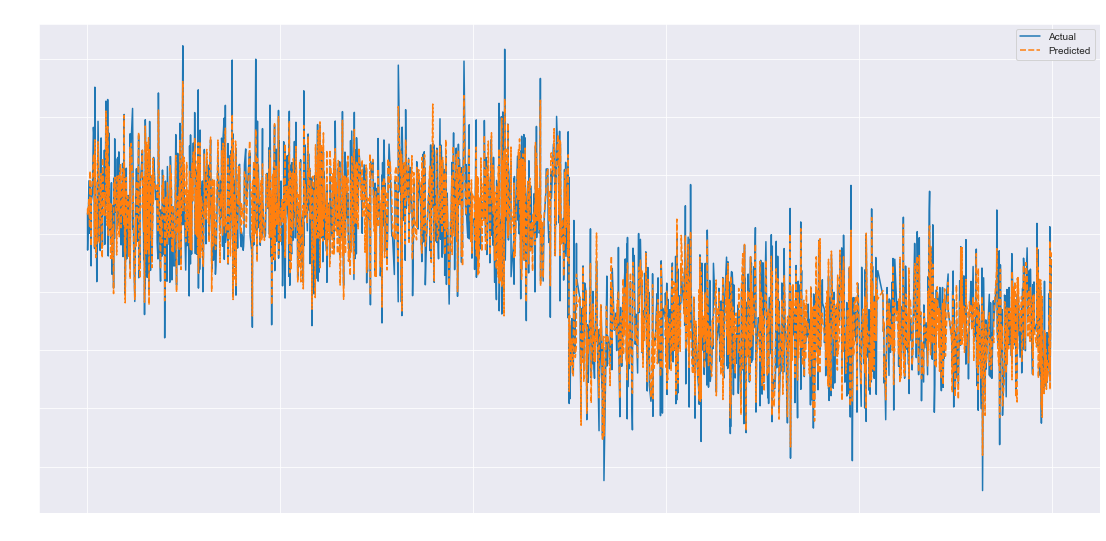

In [235]:
plt.figure(figsize=size)

sns.lineplot(data=ada_PredData)

plt.title('Ada Boosting MSE = %0.2f'%(mean_squared_error(yTest,dpPred)),fontsize=15,color='white')

plt.xticks(fontsize=15,color='white')
plt.yticks(fontsize=15,color='white')

plt.show()

In [236]:
r2_score(yTest,dpPred)

-23.923128894895374

In [ ]:
# Deep Neural Network is not perfromng well for this model